In [17]:
import tarfile
import urllib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler




# Scratch 

https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670

In [6]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Generate data

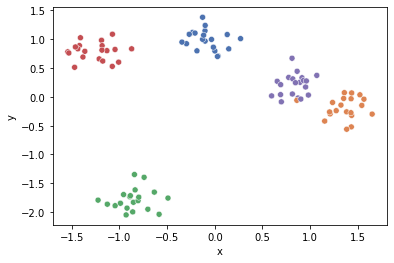

In [7]:
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Model Creation

Step1: Euclidean distances.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

In [9]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.linalg.norm(point - data), axis=1)

In [10]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
class KMeans:
   """ 
   1. initialized with a value for k and a maximum number of iterations for finding the optimal centroid locations.
   2. initialize the centroids randomly in the domain of the test dataset, with a uniform distribution.
   3. perform the iterative process of optimizing the centroid locations
   4. 
   """

    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # This initial method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

# Distinct cancer subtypes project

These data contain gene expression values from a manuscript authored by The Cancer Genome Atlas (TCGA) Pan-Cancer analysis project investigators.

There are 881 samples (rows) representing five distinct cancer subtypes. Each sample has gene expression values for 20,531 genes (columns). The dataset is available from the UC Irvine Machine Learning Repository.

https://realpython.com/k-means-clustering-python/

Download and extract the TCGA dataset from UCI:

#### download data

In [2]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

The KMeans class in scikit-learn requires a NumPy array as an argument. The NumPy package has a helper function to load the data from the text file into memory as NumPy arrays:

In [3]:
data_file = '/content/TCGA-PANCAN-HiSeq-801x20531/data.csv'
label_file = '/content/TCGA-PANCAN-HiSeq-801x20531/labels.csv'

data = np.genfromtxt(
    data_file,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    label_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

In [4]:
# Check out the first three columns of data for the first five samples
print('data: \n {}'.format(data[:5,:3]))
# Check out the first five samples of labels
print('labels: \n {}'.format(true_label_names[:5]))

data: 
 [[0.         2.01720929 3.26552691]
 [0.         0.59273209 1.58842082]
 [0.         3.51175898 4.32719872]
 [0.         3.66361787 4.50764878]
 [0.         2.65574107 2.82154696]]
labels: 
 ['PRAD' 'LUAD' 'PRAD' 'PRAD' 'BRCA']


#### Data prepartion & modeling

1. convert the abbreviations to integers: To use these labels in the evaluation methods, you first need to convert the abbreviations to integers with LabelEncoder
2. Build a pipeline
  - Build the pipeline to process data
  - Build a pipeline to perform K-means clustering
      - init: You’ll use **"k-means++"** instead of "random" to ensure centroids are initialized with some distance between them. In most cases, this will be an improvement over "random".

      - n_init: You’ll increase the number of initializations to ensure you find a stable solution.

      - max_iter: You’ll increase the number of iterations per initialization to ensure that k-means will converge.
  - Chained the pipelines to a larger pipeline

3. Evaluation Steps
  - silhouette coefficient
  - ARI (Adjusted rand index)

In [26]:
#1.convert the abbreviations to integers
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
print('True labels: \n {}'.format(true_labels[:5]))
print(label_encoder.classes_)
n_clusters = len(label_encoder.classes_)

True labels: 
 [4 3 4 4 0]
['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


In [35]:
# 2. Build pipilines
# Build the pipeline to process data
preprocessor = Pipeline(
    [
        ("scaler",MinMaxScaler()),
        ('pca',PCA(n_components=2, random_state=42)),
        
    ]
)

# Build a pipeline to perform K-means clustering

clusterer = Pipeline(
    [ 
        (
            "kmeans",
            KMeans(
                n_clusters= n_clusters,
                init = 'k-means++',
                n_init = 50,
                max_iter = 500,
                random_state = 42)
        ),

    ]
)

# Chained the pipelines

pipe = Pipeline(
    [ 
        ('preprocessor',preprocessor),
        ('clusterer',clusterer)
    ]
)

In [36]:
# calling pipe to fit the data
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [40]:
# 3. Evaluation steps
# silhouette coefficient
preprocessed_data = pipe['preprocessor'].transform(data)
predicted_labels = pipe['clusterer']['kmeans'].labels_
print(silhouette_score(preprocessed_data,predicted_labels))

# ARI
print(adjusted_rand_score(true_labels, predicted_labels))


0.5118775528450308
0.722276752060253


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


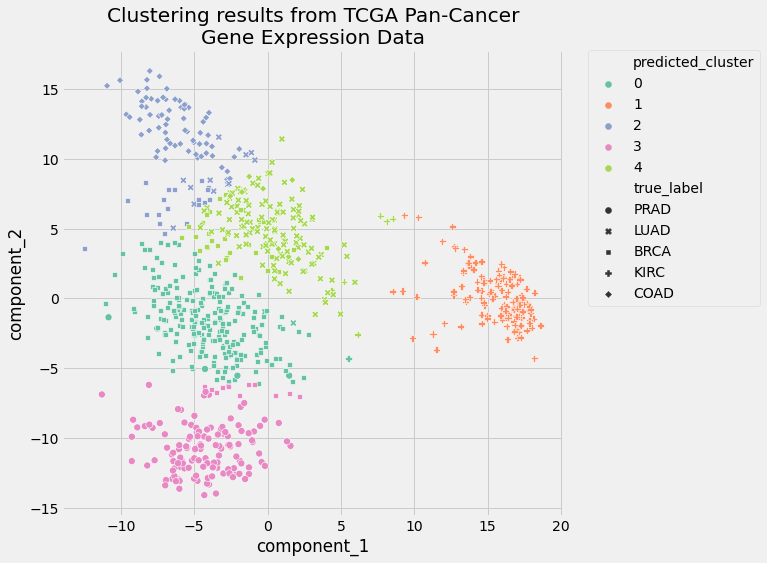

In [42]:
#  visualize the data in the context of the true labels and predicted labels
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

#### Tune the parameters

- PCA

In [43]:
silhouette_scores = []
ari_scores = []

for n in range(2,11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe['preprocessor']['pca'].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe['preprocessor'].transform(data),
        pipe['clusterer']['kmeans'].labels_
    )
    ari_score = adjusted_rand_score(true_labels,
                                    pipe['clusterer']['kmeans'].labels_)
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari_score)

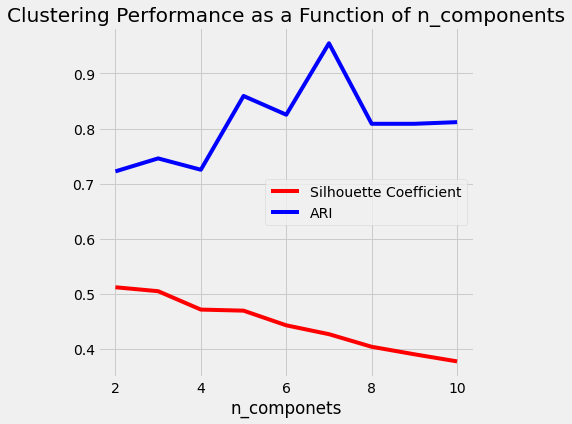

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
plt.plot(range(2,11),
         silhouette_scores,
         c='red',
         label= 'Silhouette Coefficient')
plt.plot(range(2,11),
         ari_scores,
         c='blue',
         label='ARI')
plt.xlabel('n_componets')
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.show()

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()